**File formats**

In [2]:
from PIL import Image
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage import color

im = Image.open("/content/cartoon.jpg")
print(im.mode)
#  RGB
im.save("/content/cartoon.jpg")

RGB


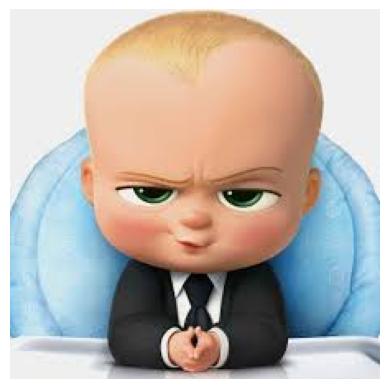

In [3]:
plt.imshow(im)
plt.axis('off')
plt.show()

** Converting from one image mode into another**

In [4]:
 im = imread("/content/cartoon.jpg", as_gray=True)
 print(im.shape)
 #(362L, 486L)

(225, 225)


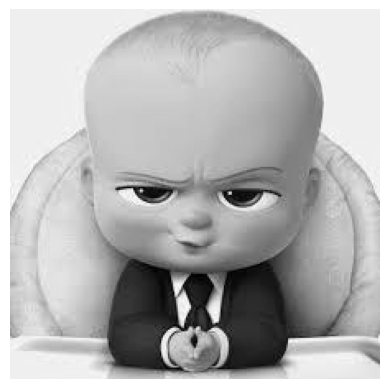

In [5]:
# Display the image
plt.imshow(im, cmap='gray')
plt.axis('off')  # Hide axis labels
plt.show()

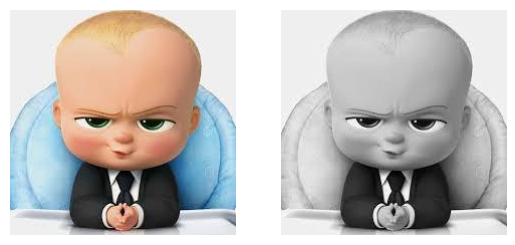

In [6]:
im = imread("/content/cartoon.jpg")
im_g = color.rgb2gray(im)
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(im_g, cmap='gray'), plt.axis('off')
plt.show()

**Some color spaces (channels)**

**Converting from one color space into another**

<Figure size 640x480 with 0 Axes>

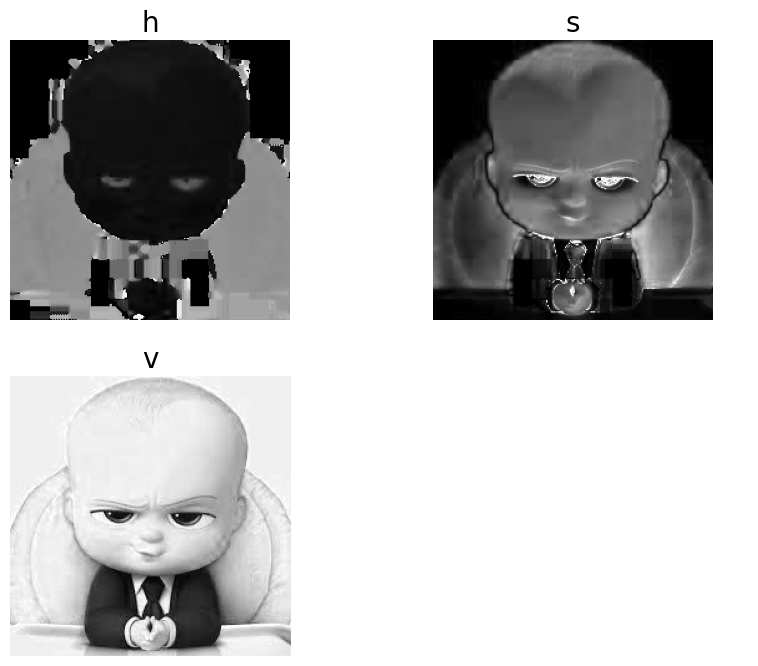

In [7]:
 im = imread("/content/cartoon.jpg")
 im_hsv = color.rgb2hsv(im)
 plt.gray()
 plt.figure(figsize=(10,8))
 plt.subplot(221), plt.imshow(im_hsv[...,0]), plt.title('h', size=20),
 plt.axis('off')
 plt.subplot(222), plt.imshow(im_hsv[...,1]), plt.title('s', size=20),
 plt.axis('off')
 plt.subplot(223), plt.imshow(im_hsv[...,2]), plt.title('v', size=20),
 plt.axis('off')
 plt.subplot(224), plt.axis('off')
 plt.show()

** Data structures to store images**

** Converting image data structures**

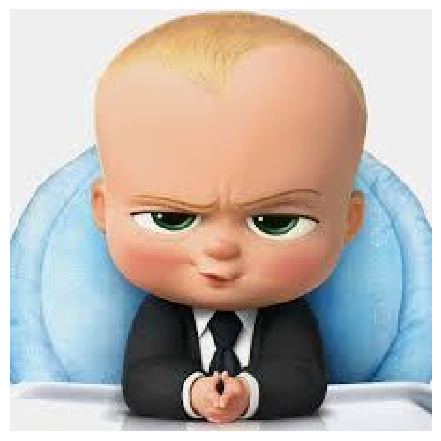

((-0.5, 224.5, 224.5, -0.5), None)

In [8]:
from PIL import Image
import numpy as np # import numpy and give it the alias np
from skimage.io import imshow
from matplotlib.pyplot import show, axis
im = Image.open('/content/cartoon.jpg' ) # read image into an Image object
with Image.open('/content/cartoon.jpg') as im: # replaced PIL with Image
  im = np.array(im) # create a numpy ndarray from the Image object
  imshow(im) # use skimage imshow to display the image
plt.axis('off'), show()

In [9]:
im = imread('/content/cartoon.jpg') # read image into numpy ndarray with skimage
im = Image.fromarray(im) # create a PIL Image object from the numpy ndarray
im.show() # display the image with PIL Image.show() method
plt.show(im)

#  Basic image manipulations

** Image manipulations with numpy array slicing **

[239 239 239]


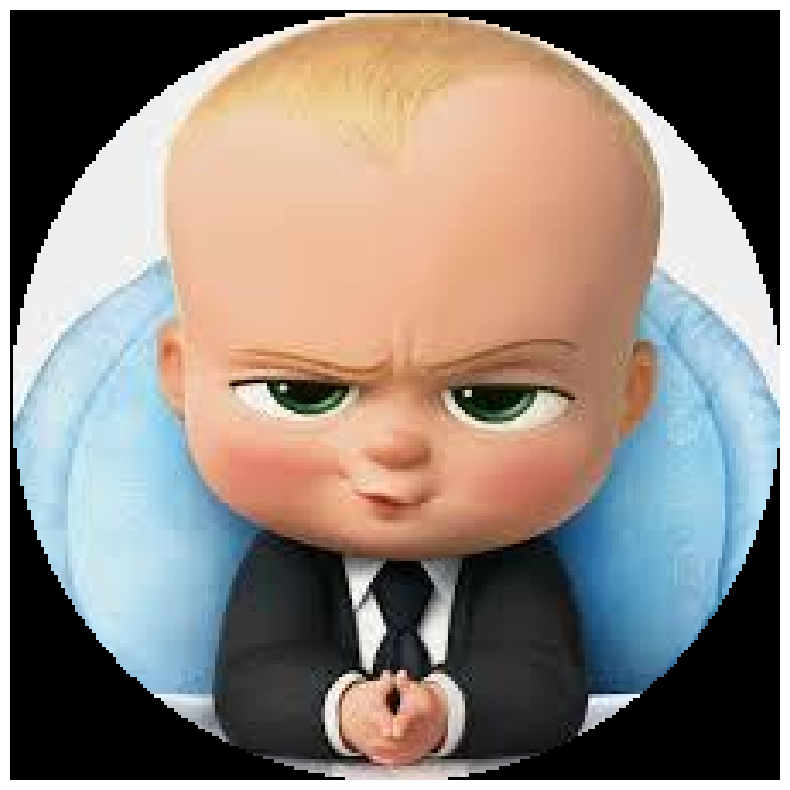

(<matplotlib.image.AxesImage at 0x7bbd18dd78e0>,
 (-0.5, 224.5, 224.5, -0.5),
 None)

In [10]:
!pip install matplotlib # install matplotlib using pip
import matplotlib.image as mpimg # import the image submodule from matplotlib and give it the alias mpimg
import matplotlib.pyplot as plt
import numpy as np

lena = mpimg.imread("/content/cartoon.jpg") # read the image from disk as a numpy ndarray
print(lena[0, 40])
# [180  76  83]
 # print(lena[10:13, 20:23,0:1]) # slicing
lx, ly, _ = lena.shape # removed indent
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4

# Create a copy of the array to modify
lena_copy = lena.copy()
lena_copy[mask,:] = 0 # masks

plt.figure(figsize=(10,10))
plt.imshow(lena_copy), plt.axis('off'), plt.show()

** Simple image morphing - α-blending of two images using cross-dissolving**

(225, 225, 3)
(1666, 1667, 3)


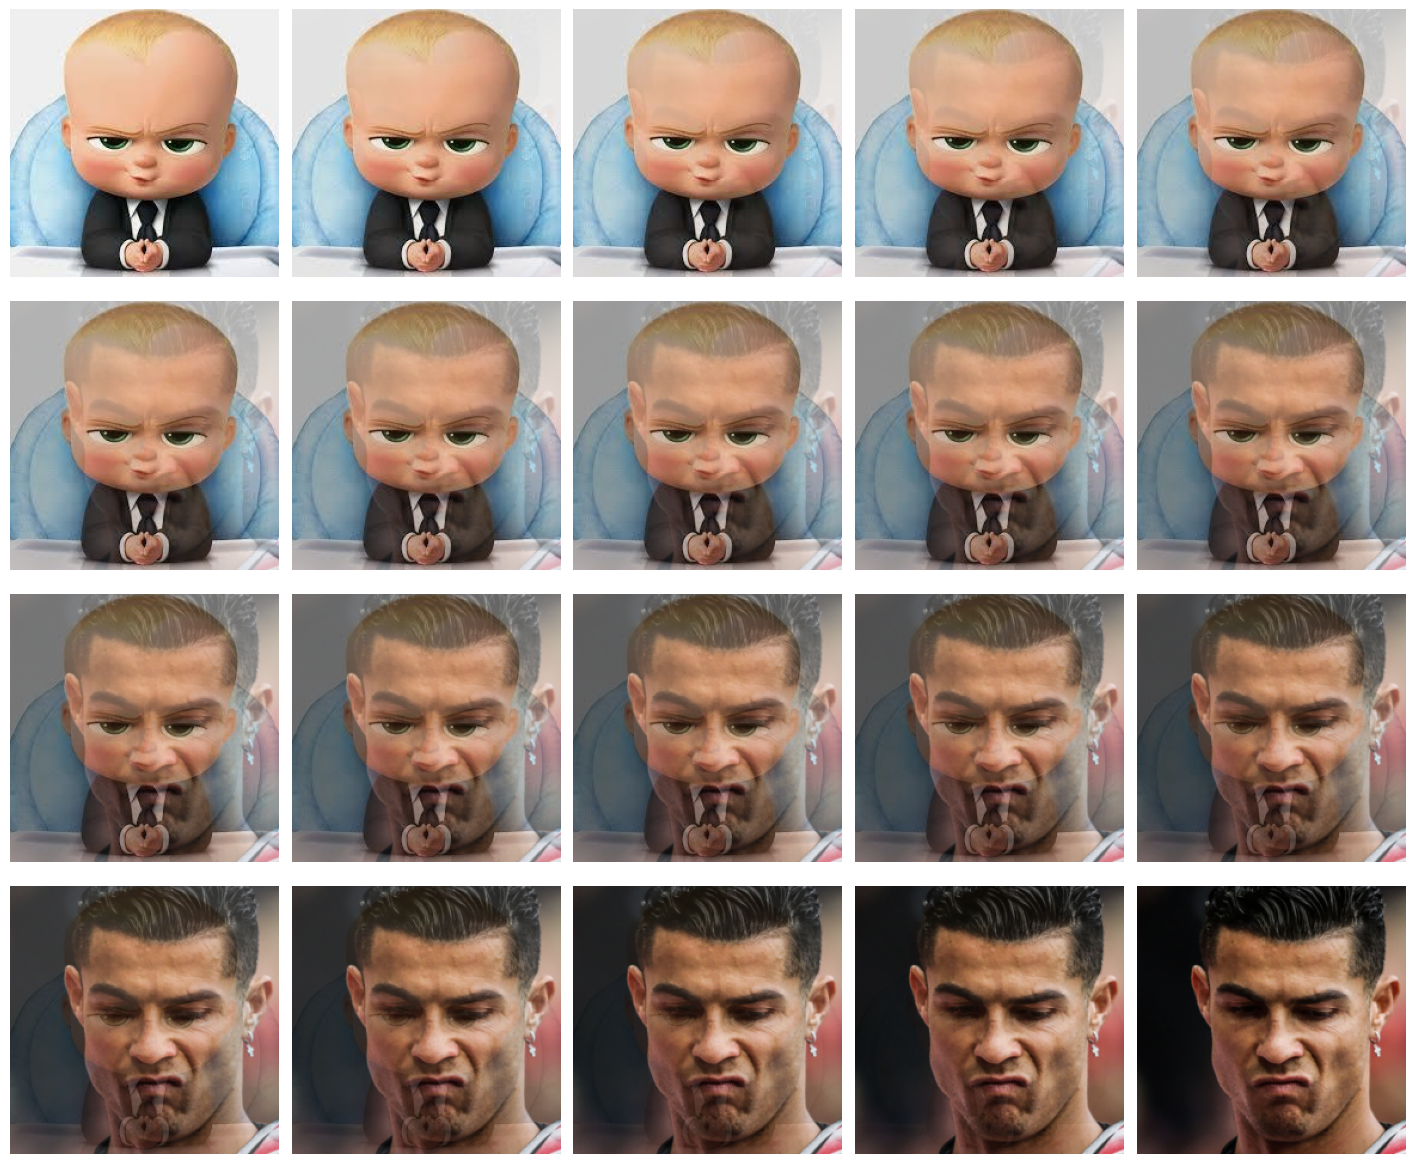

In [11]:
!pip install scikit-image # install scikit-image using pip
import matplotlib.image as mpimg # import the image submodule from matplotlib and give it the alias mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize # import the resize function from the skimage.transform module

im1 = mpimg.imread("/content/cartoon.jpg") / 255 # scale RGB values in [0,1]
im2 = mpimg.imread("/content/ronaldo.jpg") / 255

# Check the shapes of the images
print(im1.shape)
print(im2.shape)

i = 1
plt.figure(figsize=(18,15))
for alpha in np.linspace(0,1,20):
    plt.subplot(4,5,i) # indented this line

    # Resize im2 to match the shape of im1
    im2_resized = resize(im2, im1.shape)

    plt.imshow((1-alpha)*im1 + alpha*im2_resized) # indented this line
    plt.axis('off') # indented this line
    i += 1 # indented this line
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

** Image manipulations with PIL**

In [12]:
from PIL import Image
im = Image.open("/content/cartoon.jpg")        # open the image, provide the correct path
print(im.width, im.height, im.mode, im.format) # print image size, mode and format
 # 486 362 RGB PNG

225 225 RGB JPEG


**Cropping an image**

In [13]:
from PIL import Image
im = Image.open("/content/cartoon.jpg")        # open the image, provide the correct path
print(im.width, im.height, im.mode, im.format) # print image size, mode and format
 # 486 362 RGB PNG
im_c = im.crop((175,75,320,200)) # crop the rectangle given by (left, top, right, bottom) from the image
im_c.show()

225 225 RGB JPEG


** Resizing an image**

In [14]:
 im = Image.open("/content/cartoon.jpg")
 print(im.width, im.height)
 # 107 105
 im.show()

225 225


In [15]:
im_large = im.resize((im.width*5, im.height*5), Image.BILINEAR) # bi-linear interpolation

In [16]:
 im = Image.open("/content/cartoon.jpg")
 print(im.width, im.height)
 # 720 540
 im.show()

225 225


In [17]:
 im_small = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)

<ipython-input-17-e7f3984ddc44>:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im_small = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)


**Negating an image**

In [18]:
 im = Image.open("/content/cartoon.jpg")
 im_t = im.point(lambda x: 255 - x)
 im_t.show()

** Converting an image into grayscale**

In [19]:
 im_g = im.convert('L')   # convert the RGB color image to a grayscale ima

**Some gray-level transformations**

** Log transformation**

In [20]:
 im_g.point(lambda x: 255*np.log(1+x/255)).show()

**Power-law transformation**

In [21]:
 im_g.point(lambda x: 255*(x/255)**0.6).show()

**Some geometric transformations**

In [22]:
 im.transpose(Image.FLIP_LEFT_RIGHT).show() # reflect about the vertical axis

In [23]:
 im_45 = im.rotate(45) # rotate the image by 45 degrees
 im_45.show()          # show the rotated image